In [1]:
import os,sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


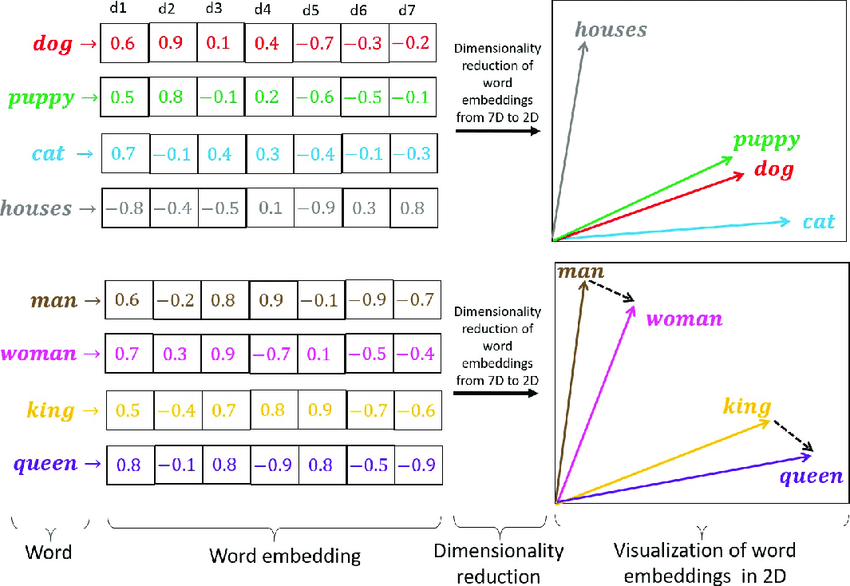

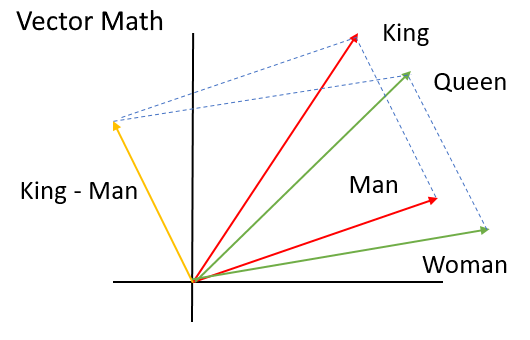

# Reading all text files using List Comprehension

In [2]:
path="/home/jayasanka/Documents/plagarism/textfiles/"
student_files = [doc for doc in os.listdir(path) if doc.endswith('.txt')]
student_notes =[open(os.path.join(path,File)).read() for File in  student_files]
print(student_files)

['fullcopy.txt', 'copy.txt', 'stu1.txt', 'jayasanka.txt', 'stu2.txt']


# Lambda function to Vectorize & Compute Similarity

In [3]:
vectorize = lambda Text: TfidfVectorizer().fit_transform(Text).toarray()

similarity = lambda doc1, doc2: cosine_similarity([doc1, doc2])

# Vectorize the Textual Data


In [4]:
vectors = vectorize(student_notes)

s_vectors = list(zip(student_files, vectors))

In [5]:
print(s_vectors)

[('fullcopy.txt', array([0.        , 0.        , 0.35320079, 0.16547046, 0.13919897,
       0.        , 0.        , 0.        , 0.16547046, 0.        ,
       0.        , 0.        , 0.        , 0.13919897, 0.16547046,
       0.        , 0.16547046, 0.        , 0.16547046, 0.16547046,
       0.16547046, 0.16547046, 0.16547046, 0.33094093, 0.        ,
       0.        , 0.16547046, 0.        , 0.16547046, 0.        ,
       0.        , 0.        , 0.        , 0.16547046, 0.        ,
       0.1177336 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.16547046, 0.33094093, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.1177336 ,
       0.        , 0.16547046, 0.        , 0.        , 0.        ,
       0.        , 0.16547046, 0.        , 0.        , 0.16547046,
       0.        , 0.        , 0.        , 0.        , 0.16547046,
       0.        , 0.27839794, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.16547046, 0

# Creating a Function to Compute Similarity

In [6]:
stuName='jayasanka.txt'

In [19]:
def check_plagiarism():
    plagiarism_results = set()
    global s_vectors
    for student_a, text_vector_a in s_vectors:
  
        if student_a==stuName:
            new_vectors =s_vectors.copy()
            current_index = new_vectors.index((student_a, text_vector_a))
            del new_vectors[current_index]
            for student_b , text_vector_b in new_vectors:
                print(text_vector_b)
                sim_score = similarity(text_vector_a, text_vector_b)[0][1]
                print(similarity(text_vector_a, text_vector_b))
                student_pair = sorted((student_a, student_b))
                score = (student_pair[0], student_pair[1],sim_score)
                plagiarism_results.add(score)
    return plagiarism_results
#Let’s print plagiarism results
for data in check_plagiarism():
    print(data)

[0.         0.         0.35320079 0.16547046 0.13919897 0.
 0.         0.         0.16547046 0.         0.         0.
 0.         0.13919897 0.16547046 0.         0.16547046 0.
 0.16547046 0.16547046 0.16547046 0.16547046 0.16547046 0.33094093
 0.         0.         0.16547046 0.         0.16547046 0.
 0.         0.         0.         0.16547046 0.         0.1177336
 0.         0.         0.         0.         0.         0.
 0.16547046 0.33094093 0.         0.         0.         0.
 0.         0.1177336  0.         0.16547046 0.         0.
 0.         0.         0.16547046 0.         0.         0.16547046
 0.         0.         0.         0.         0.16547046 0.
 0.27839794 0.         0.         0.         0.         0.
 0.16547046 0.         0.         0.         0.13919897 0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[[1. 1.]
 [1. 1.]]
[0.         0.         0.21759211 0.15290906 0.12863192 0.
 0.         0.36841547 0.15290906 0.         0.         0.
 

In [23]:
s_vectors[0][1]

array([0.        , 0.        , 0.35320079, 0.16547046, 0.13919897,
       0.        , 0.        , 0.        , 0.16547046, 0.        ,
       0.        , 0.        , 0.        , 0.13919897, 0.16547046,
       0.        , 0.16547046, 0.        , 0.16547046, 0.16547046,
       0.16547046, 0.16547046, 0.16547046, 0.33094093, 0.        ,
       0.        , 0.16547046, 0.        , 0.16547046, 0.        ,
       0.        , 0.        , 0.        , 0.16547046, 0.        ,
       0.1177336 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.16547046, 0.33094093, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.1177336 ,
       0.        , 0.16547046, 0.        , 0.        , 0.        ,
       0.        , 0.16547046, 0.        , 0.        , 0.16547046,
       0.        , 0.        , 0.        , 0.        , 0.16547046,
       0.        , 0.27839794, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.16547046, 0.        , 0.     

In [38]:
s_vectors[2][1]

array([0.12873957, 0.        , 0.12269019, 0.        , 0.        ,
       0.        , 0.12873957, 0.10386628, 0.        , 0.12873957,
       0.12873957, 0.        , 0.12873957, 0.07252963, 0.        ,
       0.12873957, 0.        , 0.12873957, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.12873957, 0.        , 0.25747914, 0.        , 0.        ,
       0.12873957, 0.12873957, 0.        , 0.        , 0.        ,
       0.0613451 , 0.        , 0.31159883, 0.        , 0.12873957,
       0.        , 0.12873957, 0.        , 0.        , 0.12873957,
       0.12873957, 0.38621871, 0.        , 0.10386628, 0.30672548,
       0.12873957, 0.        , 0.12873957, 0.        , 0.        ,
       0.        , 0.        , 0.25747914, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.12873957, 0.        ,
       0.12873957, 0.07252963, 0.        , 0.12873957, 0.        ,
       0.12873957, 0.        , 0.        , 0.12873957, 0.12873

In [40]:
cosine_similarity([[s_vectors[0][1][0]], [s_vectors[2][1][0]]])

array([[0., 0.],
       [0., 1.]])

In [45]:
vectorize(["man","queen","king","dog","puppy","dog"])

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])